# ERA5
u10, v10 and tp

Use of Cartopy because I don't know how to make background with tpoplot

In [5]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import tpoplot as plot # New plot library (https://tpoplot.readthedocs.io/en/latest/)
# import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import os

In [6]:
# Define zone
latlim=(0,50)
lonlim=(45,120)

# https://www.futura-sciences.com/planete/breves/meteorologie-mousson-exceptionnelle-inde-vue-satellite-1047/
period=slice('2019-08-01','2019-08-12')

In [105]:
u10 = xr.open_mfdataset(
    '/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_SF/2019/u10.*.as1e5.GLOBAL_025.nc', combine='by_coords'
).u10.sel(
    latitude=slice(latlim[1],latlim[0]), longitude=slice(lonlim[0],lonlim[1]), time=period
)
u10.load()

<xarray.DataArray 'u10' (time: 288, latitude: 201, longitude: 301)>
array([[[ 5.6952362e+00,  5.8251190e+00,  5.9247284e+00, ...,
          7.5578308e-01,  7.6652527e-01,  8.0558777e-01],
        [ 5.5975800e+00,  5.7098846e+00,  5.7001190e+00, ...,
          6.8742371e-01,  6.9914246e-01,  7.4211121e-01],
        [ 5.4579315e+00,  5.4862518e+00,  5.4764862e+00, ...,
          7.2648621e-01,  7.3820496e-01,  8.0656433e-01],
        ...,
        [ 1.8202362e+00,  2.1727753e+00,  2.4540253e+00, ...,
         -1.5674591e+00, -2.2041779e+00, -1.5996857e+00],
        [ 1.5692596e+00,  1.9589081e+00,  2.3026581e+00, ...,
         -2.8379669e+00, -3.2989044e+00, -2.5889435e+00],
        [ 1.3827362e+00,  1.7938690e+00,  2.1444550e+00, ...,
         -3.0547638e+00, -3.4473419e+00, -3.5567169e+00]],

       [[ 5.8316040e+00,  5.8941040e+00,  5.9995728e+00, ...,
          8.2965088e-01,  8.3551025e-01,  8.6285400e-01],
        [ 5.7427368e+00,  5.7886353e+00,  5.7163696e+00, ...,
          8.3258057e-01,  8.4722900e-01,  8.7847900e-01],
        [ 5.5571899e+00,  5.5103149e+00,  5.4370728e+00, ...,
          8.8629150e-01,  9.0191650e-01,  9.8492432e-01],
        ...,
        [ 1.3784790e+00,  1.7192993e+00,  2.0562134e+00, ...,
         -8.9984131e-01, -1.4154663e+00, -1.4164429e+00],
        [ 1.1655884e+00,  1.5503540e+00,  1.9165649e+00, ...,
         -2.2963257e+00, -2.9721069e+00, -2.7113647e+00],
        [ 1.0278931e+00,  1.4614868e+00,  1.8140259e+00, ...,
         -2.6234741e+00, -3.3861694e+00, -3.7113647e+00]],

       [[ 5.7637482e+00,  5.8106232e+00,  5.9698029e+00, ...,
          9.9617004e-01,  1.0381622e+00,  1.0586700e+00],
        [ 5.8457794e+00,  5.8838654e+00,  5.8477325e+00, ...,
          1.0615997e+00,  1.0957794e+00,  1.1231232e+00],
        [ 5.7500763e+00,  5.7520294e+00,  5.7158966e+00, ...,
          1.1426544e+00,  1.1768341e+00,  1.2608185e+00],
        ...,
        [ 7.9011536e-01,  1.1875763e+00,  1.6133575e+00, ...,
          6.5505981e-02, -4.8751831e-02, -8.3879089e-01],
        [ 6.1042786e-01,  1.0469513e+00,  1.4854279e+00, ...,
         -1.2469940e+00, -1.9462128e+00, -2.3710175e+00],
        [ 5.0105286e-01,  9.6784973e-01,  1.3907013e+00, ...,
         -1.3124237e+00, -2.4813690e+00, -3.4979706e+00]],

       ...,

       [[ 1.9303894e+00,  2.0602722e+00,  2.1833191e+00, ...,
         -3.8406372e-01, -6.0183716e-01, -6.4382935e-01],
        [ 1.8356628e+00,  1.9587097e+00,  2.0241394e+00, ...,
         -3.7136841e-01, -7.5613403e-01, -8.1961060e-01],
        [ 1.7204285e+00,  1.7780457e+00,  1.8434753e+00, ...,
         -8.4259033e-02, -4.7097778e-01, -7.3660278e-01],
        ...,
        [ 1.9919128e+00,  2.2028503e+00,  2.3581238e+00, ...,
         -3.0686340e+00, -3.2942200e+00, -2.0344543e+00],
        [ 1.6266785e+00,  1.8493347e+00,  2.0358582e+00, ...,
         -4.6809387e+00, -4.3039856e+00, -3.1096497e+00],
        [ 1.2751160e+00,  1.4674988e+00,  1.6628113e+00, ...,
         -5.1282043e+00, -4.4367981e+00, -4.8899231e+00]],

       [[ 2.3152313e+00,  2.4587860e+00,  2.5994110e+00, ...,
          2.8121948e-02, -4.3183899e-01, -6.4179993e-01],
        [ 2.3328094e+00,  2.4636688e+00,  2.4832001e+00, ...,
         -2.1514893e-03, -5.9199524e-01, -8.2246399e-01],
        [ 2.2800751e+00,  2.2693329e+00,  2.2888641e+00, ...,
          3.0644226e-01, -2.8633118e-01, -6.8379211e-01],
        ...,
        [ 2.0427704e+00,  2.2253876e+00,  2.3982391e+00, ...,
         -3.1720734e+00, -3.1417999e+00, -1.8986359e+00],
        [ 1.6443329e+00,  1.7947235e+00,  1.9431610e+00, ...,
         -4.6291046e+00, -4.0509796e+00, -2.9123077e+00],
        [ 1.2244110e+00,  1.3474579e+00,  1.4802704e+00, ...,
         -5.0363312e+00, -4.2423859e+00, -4.6291046e+00]],

       [[ 2.3638763e+00,  2.4712982e+00,  2.5875092e+00, ...,
          1.9493103e-01, -2.2206116e-01, -4.5252991e-01],
        [ 2.5035248e+00,  2.5962982e+00,  2.5923920e+00, ...,
          1.3731384e-01, -2.6502991e-01, -4.9842834e-01],
    

In [106]:
v10 = xr.open_mfdataset(
    '/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_SF/2019/v10.*.as1e5.GLOBAL_025.nc', combine='by_coords'
).v10.sel(
    latitude=slice(latlim[1],latlim[0]), longitude=slice(lonlim[0],lonlim[1]), time=period
)
v10.load()

<xarray.DataArray 'v10' (time: 288, latitude: 201, longitude: 301)>
array([[[-1.9813843 , -2.0419312 , -1.9393921 , ..., -0.5770874 ,
         -0.63275146, -0.71868896],
        [-2.1923218 , -2.258728  , -2.3104858 , ..., -0.9237671 ,
         -1.055603  , -1.1444702 ],
        [-2.562439  , -2.694275  , -2.7460327 , ..., -1.0077515 ,
         -1.140564  , -1.1190796 ],
        ...,
        [ 6.085022  ,  5.830139  ,  5.5342407 , ...,  4.2852173 ,
          3.0947876 ,  1.6484985 ],
        [ 5.9072876 ,  5.5967407 ,  5.2647095 , ...,  3.5332642 ,
          2.9111938 ,  1.3652954 ],
        [ 5.7246704 ,  5.428772  ,  5.123108  , ...,  2.373108  ,
          1.9834595 ,  1.2295532 ]],

       [[-2.1440887 , -2.0688934 , -1.8638153 , ..., -0.69584656,
         -0.80522156, -0.9546356 ],
        [-2.045456  , -1.9770966 , -1.9282684 , ..., -0.9995575 ,
         -1.1040497 , -1.2436981 ],
        [-2.1206512 , -2.1655731 , -2.1157684 , ..., -0.99565125,
         -1.10112   , -1.0981903 ],
        ...,
        [ 6.091263  ,  5.780716  ,  5.472122  , ...,  4.095169  ,
          2.8637238 ,  1.6938019 ],
        [ 5.9174347 ,  5.525833  ,  5.1840363 , ...,  3.5268097 ,
          2.9506378 ,  1.6059113 ],
        [ 5.7152863 ,  5.376419  ,  5.0668488 , ...,  2.6947784 ,
          2.3002472 ,  1.5180206 ]],

       [[-2.810135  , -2.6372833 , -2.3540802 , ..., -0.60310364,
         -0.79548645, -1.0406036 ],
        [-2.5493927 , -2.3843536 , -2.2241974 , ..., -0.82673645,
         -1.0093536 , -1.2447052 ],
        [-2.3423615 , -2.3003693 , -2.1392365 , ..., -0.8199005 ,
         -1.0025177 , -1.0738068 ],
        ...,
        [ 6.0150604 ,  5.683029  ,  5.3832245 , ...,  4.109787  ,
          2.7924042 ,  1.8422089 ],
        [ 5.814865  ,  5.4369354 ,  5.107834  , ...,  3.4174042 ,
          2.7924042 ,  1.6322479 ],
        [ 5.5902557 ,  5.3070526 ,  5.0121307 , ...,  2.6351776 ,
          2.1927948 ,  1.406662  ]],

       ...,

       [[-2.0059204 , -2.0967407 , -2.1680298 , ...,  2.11615   ,
          1.9130249 ,  1.874939  ],
        [-2.0078735 , -2.0986938 , -2.1846313 , ...,  1.9804077 ,
          1.7987671 ,  1.7645874 ],
        [-2.0752563 , -2.1817017 , -2.2686157 , ...,  1.6727905 ,
          1.4901733 ,  1.4950562 ],
        ...,
        [ 9.365173  ,  9.274353  ,  9.263611  , ...,  1.6532593 ,
          0.7675171 ,  0.55462646],
        [ 9.443298  ,  9.466736  ,  9.496033  , ...,  1.2421265 ,
          1.2958374 ,  0.6317749 ],
        [ 9.497009  ,  9.660095  ,  9.683533  , ...,  0.52142334,
          0.84173584,  0.30267334]],

       [[-2.2514343 , -2.4154968 , -2.5707703 , ...,  2.292511  ,
          2.1870422 ,  2.0376282 ],
        [-2.1498718 , -2.3061218 , -2.3813171 , ...,  2.0122375 ,
          2.0854797 ,  1.9555969 ],
        [-2.1186218 , -2.183075  , -2.2582703 , ...,  1.7290344 ,
          1.8032532 ,  1.8735657 ],
        ...,
        [ 8.349152  ,  8.339386  ,  8.358917  , ...,  1.2016907 ,
          0.34329224,  0.38430786],
        [ 8.540558  ,  8.604034  ,  8.6138    , ...,  1.0503235 ,
          1.0513    ,  0.62942505],
        [ 8.695831  ,  8.880402  ,  8.889191  , ...,  0.7055969 ,
          0.8911438 ,  0.39505005]],

       [[-2.336029  , -2.516693  , -2.6846619 , ...,  1.8124084 ,
          1.844635  ,  1.8016663 ],
        [-2.1846619 , -2.3594666 , -2.4483337 , ...,  1.6288147 ,
          1.8905334 ,  1.8739319 ],
        [-2.0713806 , -2.1700134 , -2.257904  , ...,  1.5223694 ,
          1.7850647 ,  1.992096  ],
        ...,
        [ 8.135651  ,  8.022369  ,  8.072174  , ...,  1.2518616 ,
          0.60147095,  0.5243225 ],
        [ 8.382721  ,  8.350494  ,  8.367096  , ...,  1.2362366 ,
          1.2020569 ,  0.72647095],
        [ 8.620026  ,  8.786041  ,  8.796783  , ...,  0.91397095,
          1.0057678 ,  0.6395569 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 0.75 0.5 0.25 0.0
  * longitude  (longitude) float32 45.0 45.25 45.5 

## Get precip that I downloaded

In [122]:
tp = xr.open_dataarray(
    '/data/mlalande/ERA5/animation_ERA5/adaptor.mars.internal-1593187979.6003675-25029-9-8db8067c-533f-451b-ac26-42d60500974d.nc'
)

with xr.set_options(keep_attrs=True):
    tp = tp * 1e3
    tp.attrs['units'] = 'mm'

tp.load()

<xarray.DataArray 'tp' (time: 288, latitude: 201, longitude: 301)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00917166, 0.01000427, 0.0125058 , ..., 0.        ,
         0.        , 0.00083447],
        [0.00667013, 0.00667013, 0.00667013, ..., 0.        ,
         0.        , 0.00166707],
        [0.01000427, 0.01083873, 0.01083873, ..., 0.        ,
         0.        , 0.00500306]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00583567, 0.01000427, 0.01167133, ..., 0.        ,
         0.        , 0.00083447],
        [0.00500306, 0.0083372 , 0.00917166, ..., 0.        ,
         0.        , 0.00250153],
        [0.00500306, 0.0083372 , 0.01083873, ..., 0.        ,
         0.        , 0.0041686 ]],

       [[0.        , 0.        , 0.        , ..., 0.00083447,
         0.00333413, 0.00500306],
        [0.        , 0.        , 0.        , ..., 0.00166707,
         0.00083447, 0.00250153],
        [0.        , 0.        , 0.        , ..., 0.00166707,
         0.00166707, 0.00083447],
        ...,
        [0.00583567, 0.00583567, 0.0083372 , ..., 0.        ,
         0.        , 0.06752834],
        [0.00250153, 0.00750273, 0.01583993, ..., 0.00083447,
         0.        , 0.05252287],
        [0.00083447, 0.00667013, 0.0166744 , ..., 0.00083447,
         0.01083873, 0.0083372 ]],

       ...,

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.01500733, 0.01500733, 0.0125058 , ..., 0.        ,
         0.        , 0.00166707],
        [0.0125058 , 0.0083372 , 0.01083873, ..., 0.        ,
         0.00083447, 0.00500306],
        [0.017507  , 0.0125058 , 0.01083873, ..., 0.        ,
         0.00250153, 0.12005121]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.0808686 , 0.13005547, 0.12755394, ..., 0.        ,
         0.        , 0.00083447],
        [0.11171401, 0.12421981, 0.10587834, ..., 0.        ,
         0.00083447, 0.00500306],
        [0.09253994, 0.0900384 , 0.08420274, ..., 0.        ,
         0.00166707, 0.10504574]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.19091554, 0.1542326 , 0.16590394, ..., 0.        ,
         0.        , 0.00083447],
        [0.14756247, 0.13505854, 0.1367256 , ..., 0.        ,
         0.00083447, 0.01500733],
        [0.11171401, 0.14339387, 0.12421981, ..., 0.00083447,
         0.00250153, 0.11671707]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 45.0 45.25 45.5 45.75 ... 119.5 119.75 120.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2019-08-01 ... 2019-08-12T23:00:00
Attributes:
    units:      mm
    long_name:  Total precipitation

## Make a new colorbar (with shading)
https://stackoverflow.com/questions/51601272/python-matplotlib-heatmap-colorbar-from-transparent

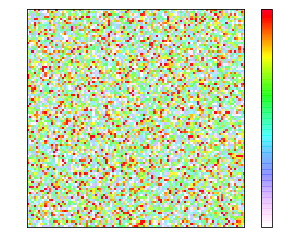

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# get colormap
ncolors = 256
color_array = plt.get_cmap('gist_rainbow_r')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

# show some example data
f,ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100),cmap='rainbow_alpha')
plt.colorbar(mappable=h)

## Make plot
- tpoblem with the background image (not good resolution): https://gis.stackexchange.com/questions/313490/increasing-resolution-of-cartopy-stock-background
- Possible better solution: http://earthpy.org/tag/cartopy.html

In [125]:
os.environ["CARTOPY_USER_BACKGROUNDS"] = "/data/mlalande/PYTHON/cartopy/BG"

In [127]:
# draw filled contours.
clevs = [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 10]

# In future MetPy
# norm, cmap = ctables.registry.get_with_boundaries('precipitation', clevs)
cmap_data = plt.get_cmap('rainbow_alpha')(range(ncolors))

cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
# cmap.set_over(cmap_data[-1])
# cmap.set_under(cmap_data[0])

norm = mcolors.BoundaryNorm(clevs, cmap.N)

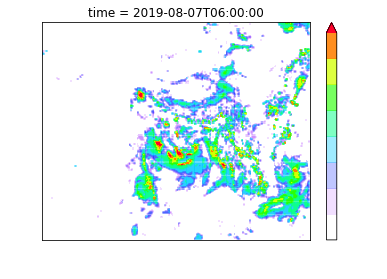

In [128]:
tp[150].plot(cmap=cmap, levels=clevs, extend='max')

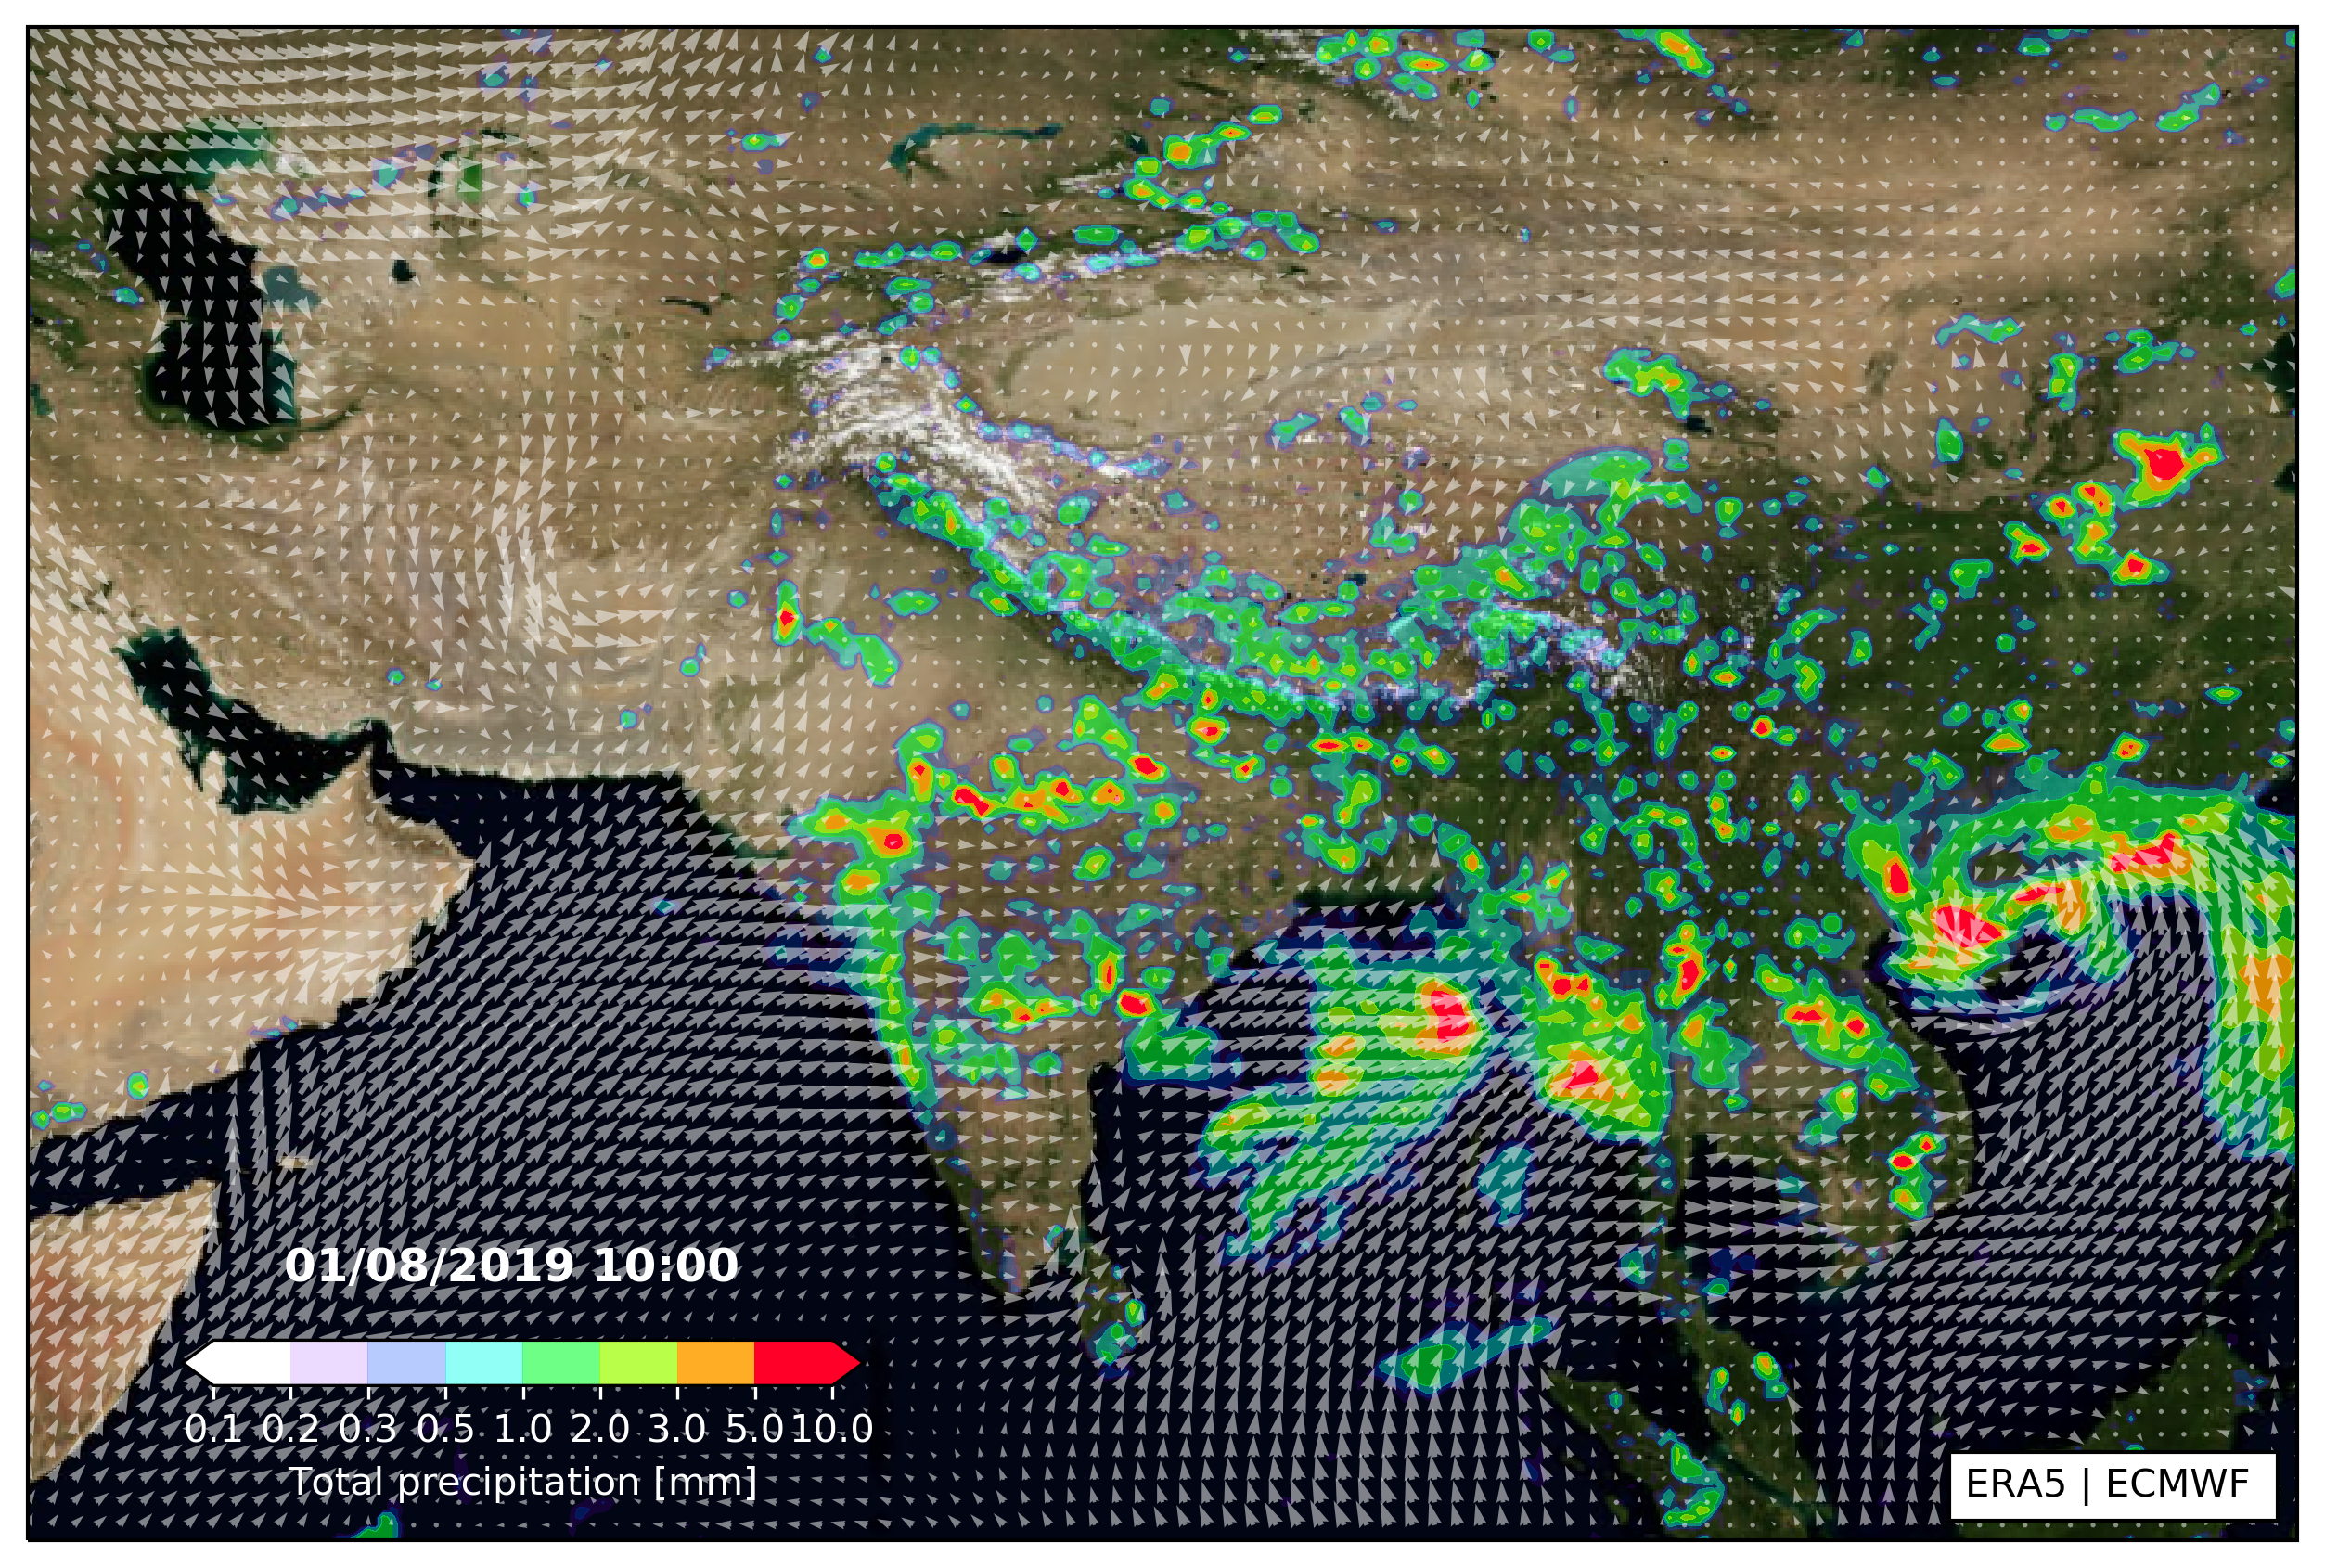

In [129]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.offsetbox import AnchoredText

i = 10

# To make white text
# https://stackoverflow.com/questions/47906119/matplotlib-colorbar-minor-ticks-color-and-number-of-minor-ticks?rq=1
background = 0
if background == 0:
    back_color='black'
    fore_color='white'
else:
    back_color='white'
    fore_color='black'

plt.rcParams["text.color"] = back_color
plt.rcParams["axes.labelcolor"] = fore_color
plt.rcParams["xtick.color"] =  fore_color
plt.rcParams["ytick.color"] = fore_color


dpi = 300
# dpi: https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# fig = plt.figure(figsize=(1920/dpi, 1080/dpi), dpi=dpi) # Full HD
fig = plt.figure(figsize=(3840/dpi, 2160/dpi), dpi=dpi) # 4K not really because of the bbox_inches='tight'

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())

# Add background image
# ax.stock_img()
ax.background_img(name='BM', resolution='high')


# Add the tpecip
# tp[0].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')
X, Y = np.meshgrid(tp.longitude.values, tp.latitude.values)
# m = ax.contourf(X, Y, tp[i], cmap='rainbow_alpha', levels=np.arange(0,5.5,0.5), extend='max', transform=ccrs.PlateCarree())
m = ax.contourf(X, Y, tp[i], cmap=cmap, levels=clevs, norm=norm, extend='both', transform=ccrs.PlateCarree())

# Add the winds
k = 3 # don't take all
ax.quiver(u10.longitude[::k], u10.latitude[::k], u10[i,::k,::k], v10[i,::k,::k], alpha=0.5, color='white')

# Put the colorbar inside the figure
# https://stackoverflow.com/questions/18211967/position-colorbar-inside-figure
cbaxes = inset_axes(ax, width="30%", height="3%", loc="lower left", borderpad=4) 
fig.colorbar(m, cax=cbaxes, orientation='horizontal', label="Total precipitation [mm]")

# Add the date
ax.text(61, 9, str(tp[i].time.dt.strftime('%d/%m/%Y %H:%M').values), 
         horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold', color='white'
        )

anchored_text = AnchoredText("ERA5 | ECMWF ", loc="lower right")
ax.add_artist(anchored_text)

# plt.savefig('test.png', dpi=dpi, bbox_inches='tight')

plt.show()

## Save images
Try to save without displaying image: 
https://stackoverflow.com/questions/15713279/calling-pylab-savefig-without-display-in-ipython

Not the first solution but the second

In [130]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

for i in range(u10.time.size):
    print(i)
    # To make white text
    # https://stackoverflow.com/questions/47906119/matplotlib-colorbar-minor-ticks-color-and-number-of-minor-ticks?rq=1
    background = 0
    if background == 0:
        back_color='black'
        fore_color='white'
    else:
        back_color='white'
        fore_color='black'

    plt.rcParams["text.color"] = back_color
    plt.rcParams["axes.labelcolor"] = fore_color
    plt.rcParams["xtick.color"] =  fore_color
    plt.rcParams["ytick.color"] = fore_color


    dpi = 300
    # dpi: https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
    # fig = plt.figure(figsize=(1920/dpi, 1080/dpi), dpi=dpi) # Full HD
    fig = plt.figure(figsize=(3840/dpi, 2160/dpi), dpi=dpi) # 4K not really because of the bbox_inches='tight'

    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())

    # Add background image
    # ax.stock_img()
    ax.background_img(name='BM', resolution='high')


    # Add the tpecip
    # tp[0].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')
    X, Y = np.meshgrid(tp.longitude.values, tp.latitude.values)
    # m = ax.contourf(X, Y, tp[i], cmap='rainbow_alpha', levels=np.arange(0,5.5,0.5), extend='max', transform=ccrs.PlateCarree())
    m = ax.contourf(X, Y, tp[i], cmap=cmap, levels=clevs, norm=norm, extend='both', transform=ccrs.PlateCarree())

    # Add the winds
    k = 3 # don't take all
    ax.quiver(u10.longitude[::k], u10.latitude[::k], u10[i,::k,::k], v10[i,::k,::k], alpha=0.5, color='white')

    # Put the colorbar inside the figure
    # https://stackoverflow.com/questions/18211967/position-colorbar-inside-figure
    cbaxes = inset_axes(ax, width="30%", height="3%", loc="lower left", borderpad=4) 
    fig.colorbar(m, cax=cbaxes, orientation='horizontal', label="Total precipitation [mm]")

    # Add the date
    ax.text(61, 9, str(tp[i].time.dt.strftime('%d/%m/%Y %H:%M').values), 
             horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold', color='white'
            )

    anchored_text = AnchoredText("ERA5 | ECMWF ", loc="lower right")
    ax.add_artist(anchored_text)

    plt.savefig('img/ERA5/IMG_'+str(i).zfill(4)+'.png', dpi=dpi, bbox_inches='tight')

    plt.close(fig)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Make video
https://stackoverflow.com/questions/22965569/convert-from-jpg-to-mp4-by-ffmpeg

I didn't succed with FuncAnimation from matplotlib :https://courspython.com/animation-matplotlib.html

For slowing down: https://trac.ffmpeg.org/wiki/How%20to%20speed%20up%20/%20slow%20down%20a%20video

In [13]:
ffmpeg -f image2 -i img/ERA5/IMG_%4d.png -filter:v "setpts=2.0*PTS" ERA5_animation.mp4

/bin/sh: ffmpeg : commande introuvable
